# 1. Importing Library and Dataset

In [1]:
#!pip install -U kaleido

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [32]:
df=pd.read_csv("../input/uber-and-lyft-dataset-boston-ma/rideshare_kaggle.csv")
df.head()

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type    product_id          name  price  distance  surge_multiplier  \
0     Lyft     lyft_line        Shared    5.0      0.44               1.0   
1     Lyft  lyft_premier           Lux   11.0      0.44               1.0   
2     Lyft          lyft          Lyft    7.0      0.44               1.0   
3     Lyft   lyft_luxsuv  Lux Black XL   26.0      0.44               1.0   
4     Lyft     lyft_plus       Lyft XL    9.0      0.44               1.0   

   latitude  longitude  temperature  apparentTemperature    short_summary  \
0   42.2148    -71.033        42.34                37.12   Mostly Cloudy    
1   42.2148    -71.033        43.58                37.35            Rain    
2   42.2148    -71.033        38.33                32.93           Clear    
3   42.2148    -71.033        34.38                29.63           Clear    
4   42.2148    -71.033        37.44                30.88   Partly Cloudy    

                                        long_summary  precipIntensity  \
0                          Rain throughout the day.            0.0000   
1   Rain until morning, starting again in the eve...           0.1299   
2                        Light rain in the morning.            0.0000   
3                 Partly cloudy throughout the day.            0.0000   
4                 Mostly cloudy throughout the day.            0.0000   

   precipProbability  humidity  windSpeed  windGust  windGustTime  visibility  \
0                0.0      0.68       8.66      9.17    1545015600      10.000   
1                1.0      0.94      11.98     11.98    1543291200       4.786   
2                0.0      0.75       7.33      7.33    1543334400      10.000   
3                0.0      0.73       5.28      5.28    1543514400      10.000   
4                0.0      0.70       9.14      9.14    1543446000      10.000   

   temperatureHigh  temperatureHighTime  temperatureLow  temperatureLowTime  \
0            43.68           1544968800           34.19          1545048000   
1            47.30           1543251600           42.10          1543298400   
2            47.55           1543320000           33.10          1543402800   
3            45.03           1543510800           28.90          1543579200   
4            42.18           1543420800           36.71          1543478400   

   apparentTemperatureHigh  apparentTemperatureHighTime  \
0                    37.95                   1544968800   
1                    43.92                   1543251600   
2                    44.12                   1543320000   
3                    38.53                   1543510800   
4                    35.75                   1543420800   

   apparentTemperatureLow  apparentTemperatureLowTime                   icon  \
0                   27.39                  1545044400   partly-cloudy-night    
1                   36.20                  1543291200                  rain    
2                   29.11                  1543392000           clear-night    
3                   26.20                  1543575600           clear-night    
4                   30.29                

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [34]:
df['datetime']=pd.to_datetime(df['datetime'])

### Data Cleaning

In [35]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [36]:
df.dropna(axis=0,inplace=True)

In [37]:
df.isnull().sum().sum()

0

In [38]:
df['visibility'].head()

0    10.000
1     4.786
2    10.000
3    10.000
4    10.000
Name: visibility, dtype: float64

In [39]:
df['visibility.1'].head()

0    10.000
1     4.786
2    10.000
3    10.000
4    10.000
Name: visibility.1, dtype: float64

In [40]:
df = df.drop(['visibility.1'],axis=1)

# 2. EDA and Visualization

## 1. Time Analysis 

### --Month Data--

In [41]:
def plot_bar(groupby_column):
    df1 =df.groupby(groupby_column).size().reset_index(name="counts")
    fig1 = px.bar(data_frame=df1, x=groupby_column, y="counts", color=groupby_column, barmode="group")
    print(df1)
    return fig1

In [42]:
plot_bar('month')

   month  counts
0     11  263771
1     12  374205


### It appears that we only have november and december in our month data. It means the data is only recorded or taken in november and december with december data dominating.

### --Day Data--

In [24]:
plot_bar('day')

    day  counts
0     1   41680
1     2   41298
2     3   41323
3     4   11627
4     9    1529
5    10    2534
6    13   35496
7    14   41344
8    15   41332
9    16   41359
10   17   41354
11   18   33329
12   26   29028
13   27   70135
14   28   67842
15   29   55222
16   30   41544


### It seems we have many gaps in our 'day' data. For example we don't have data from 19th day until 25th day in each month.

### --Hour Data--

In [25]:
plot_bar('hour')

    hour  counts
0      0   29872
1      1   26310
2      2   26323
3      3   25530
4      4   26125
5      5   22995
6      6   25147
7      7   22930
8      8   22337
9      9   26673
10    10   27918
11    11   27946
12    12   28017
13    13   27977
14    14   27976
15    15   27868
16    16   27972
17    17   28075
18    18   27958
19    19   25410
20    20   24620
21    21   25549
22    22   27093
23    23   29355


### It seems we have almost 24 hours recorded data

## 2. Source and Destination Analysis

In [26]:
plot_bar('source')

                     source  counts
0                  Back Bay   53201
1               Beacon Hill   52841
2         Boston University   53172
3                    Fenway   53166
4        Financial District   54197
5          Haymarket Square   53147
6                 North End   53171
7             North Station   52576
8   Northeastern University   53164
9             South Station   53160
10         Theatre District   53201
11                 West End   52980


### It seems that all sources are almost equal in number. There are about 50k data in each source feature (Back Bay, Beacon Hill, Boston University, etc)

In [27]:
plot_bar('destination')

                destination  counts
0                  Back Bay   53190
1               Beacon Hill   52840
2         Boston University   53171
3                    Fenway   53166
4        Financial District   54192
5          Haymarket Square   53171
6                 North End   53164
7             North Station   52577
8   Northeastern University   53165
9             South Station   53159
10         Theatre District   53189
11                 West End   52992


### Same with source feature, there are about 50k data in each destination feature (Back Bay, Beacon Hill, Boston University, etc)

In [28]:
df.groupby(by=["destination","source"]).agg({'latitude':'mean','longitude':'mean'})

latitude  longitude
destination             source                                       
Back Bay                Boston University        42.336960 -71.066178
                        Fenway                   42.337740 -71.065822
                        Haymarket Square         42.337087 -71.065110
                        North End                42.338100 -71.066343
                        Northeastern University  42.336668 -71.065314
                        South Station            42.338897 -71.065908
Beacon Hill             Boston University        42.336917 -71.065885
                        Fenway                   42.338990 -71.065719
                        Haymarket Square         42.337413 -71.066059
                        North End                42.338418 -71.065809
                        Northeastern University  42.337268 -71.066061
                        South Station            42.336316 -71.065699
Boston University       Back Bay                 42.337217 -71.065947
                        Beacon Hill              42.339364 -71.066517
                        Financial District       42.339361 -71.066465
                        North Station            42.338372 -71.066191
                        Theatre District         42.338152 -71.066276
                        West End                 42.337556 -71.066265
Fenway                  Back Bay                 42.340103 -71.065819
                        Beacon Hill              42.337595 -71.065471
                        Financial District       42.337147 -71.066254
                        North Station            42.339660 -71.066504
                        Theatre District         42.336378 -71.065388
                        West End                 42.338521 -71.066339
Financial District      Boston University        42.338733 -71.066581
                        Fenway                   42.337034 -71.066028
                        Haymarket Square         42.337781 -71.065863
                        North End                42.338338 -71.065965
                        Northeastern University  42.338523 -71.065964
                        South Station            42.338989 -71.067037
Haymarket Square        Back Bay                 42.339877 -71.066475
                        Beacon Hill              42.337246 -71.065966
                        Financial District       42.337398 -71.066237
                        North Station            42.338276 -71.066073
                        Theatre District         42.338175 -71.065699
                        West End                 42.339109 -71.066251
North End               Back Bay                 42.338516 -71.066170
                        Beacon Hill              42.336792 -71.066216
                        Financial District       42.337654 -71.066158
                        North Station            42.339309 -71.066936
                        Theatre District         42.338578 -71.066639
                        West End                 42.338614 -71.065878
North Station           Boston University        42.338786 -71.066362
                        Fenway                   42.338450 -71.066614
                        Haymarket Square         42.337260 -71.066279
                        North End                42.337672 -71.065832
                        Northeastern University  42.337793 -71.066491
                        South Station            42.336529 -71.065432
Northeastern University Back Bay                 42.338917 -71.066289
                        Beacon Hill              42.339002 -71.065600
                        Financial District       42.337789 -71.066015
                        North Station            42.339770 -71.066493
                        Theatre District         42.338356 -71.065319
                        West End                 42.336812 -71.066274
South Station           Back Bay                 42.338567 -71.065891
                        Beacon Hill              42.338714 -

### Here i make a geospatial map to visualize our data which the departure point of the trips is haymarket square. I plot them using clusters instead of marker. The map rendered by folium is interactive, we can slide, drag, and zoom in/out.

In [18]:
import geopandas as gpd
import folium
from folium.plugins import FastMarkerCluster
df1 = df[df['source']=='Haymarket Square']
my_map = folium.Map(location=[df1["latitude"].mean(), df1["longitude"].mean()],zoom_start = 10)
my_map.add_child(FastMarkerCluster(df1[['latitude', 'longitude']].values.tolist(),color='green'))
my_map

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



### We can see that trips which their sources are Haymarket Square have two groups or clusters of destination that contain many places (we can see them if we zoom the map). Many of them are in boston area as we can see that there are 46256 data in that cluster.

## 3. Cab Type Analysis

In [19]:
plot_bar('cab_type')

  cab_type  counts
0     Lyft  307408
1     Uber  330568


### So for our whole data, we have uber data more than lyft data. The difference is not too big, each cab type has about 300K data.

In [20]:
df2 =df.groupby(by=["day","cab_type"]).size().reset_index(name="counts")
fig2 = px.bar(data_frame=df2, x="day", y="counts", color="cab_type", barmode="group")
fig2

In [21]:
df3 =df.groupby(["hour","cab_type"]).size().reset_index(name="counts")
fig3 = px.bar(data_frame=df3, x="hour", y="counts", color="cab_type", barmode="group")
fig3

### Uber seems to be favourite among customers

## 4. Price Analysis

### We can see average or mean of our price data in every route (source-destination) through table below

In [33]:
pd.set_option('display.max_rows', 72)
df.groupby(by=["source","destination","cab_type"]).price.agg(["mean"])

mean
source   destination             cab_type           
Back Bay Boston University       Lyft      14.930956
                                 Uber      13.217685
         Fenway                  Lyft      14.528965
                                 Uber      12.845317
         Haymarket Square        Lyft      18.874528
...                                              ...
West End North End               Uber      13.348787
         Northeastern University Lyft      19.785985
                                 Uber      18.203448
         South Station           Lyft      15.677702
                                 Uber      14.414049

[144 rows x 1 columns]

### Distribution of Price

In [43]:
df[['price','distance','surge_multiplier']].describe()

price       distance  surge_multiplier
count  637976.000000  637976.000000     637976.000000
mean       16.545125       2.189261          1.015068
std         9.324359       1.135413          0.095422
min         2.500000       0.020000          1.000000
25%         9.000000       1.270000          1.000000
50%        13.500000       2.160000          1.000000
75%        22.500000       2.930000          1.000000
max        97.500000       7.860000          3.000000

In [ ]:
price_df = df[['price','distance','surge_multiplier']]
price_df

In [36]:
fig = px.box(price_df, y='price')

fig.show()

In [37]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)

    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [38]:
for col in list(price_df.columns):
    outliers = find_outliers_IQR(price_df[col])
    print (col + '-----\n')

    print('number of outliers: '+ str(len(outliers)))

    print('max outlier value: '+ str(outliers.max()))

    print('min outlier value: '+ str(outliers.min()))
    print ('-----\n')

price-----

number of outliers: 5589
max outlier value: 97.5
min outlier value: 43.0
-----

distance-----

number of outliers: 6672
max outlier value: 7.86
min outlier value: 5.43
-----

surge_multiplier-----

number of outliers: 20975
max outlier value: 3.0
min outlier value: 1.25
-----



In [41]:
upper_limit = df['price'].mean() + 3*df['price'].std()

print(upper_limit)

lower_limit = df['price'].mean() - 3*df['price'].std()

print(lower_limit)

44.518201234872336
-11.427950253644202


### Applying log transform to reduce the outliers

In [39]:
import numpy as np
price_df[list(price_df.columns)] = price_df[list(price_df.columns)].applymap(lambda x: np.log(x) if x > 0 else x)


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
for col in list(price_df.columns):
    outliers = find_outliers_IQR(price_df[col])
    print (col + '-----\n')

    print('number of outliers: '+ str(len(outliers)))

    print('max outlier value: '+ str(outliers.max()))

    print('min outlier value: '+ str(outliers.min()))
    print ('-----\n')

price-----

number of outliers: 22
max outlier value: 4.579852378003801
min outlier value: 4.48863636973214
-----

distance-----

number of outliers: 594
max outlier value: -1.0498221244986778
min outlier value: -3.912023005428146
-----

surge_multiplier-----

number of outliers: 20975
max outlier value: 1.0986122886681098
min outlier value: 0.22314355131420976
-----



In [62]:
df[df['destination']=='Fenway'][['latitude','longitude']]

latitude  longitude
37       42.3661   -71.0631
38       42.3661   -71.0631
39       42.3661   -71.0631
41       42.3661   -71.0631
42       42.2148   -71.0330
...          ...        ...
693042   42.3647   -71.0542
693043   42.3647   -71.0542
693048   42.3647   -71.0542
693051   42.3647   -71.0542
693053   42.3647   -71.0542

[53166 rows x 2 columns]

The latitude longitude features doesn't make much sense

# 3. Data Preprocessing / Feature Engineering

## 1. Removing Unnecessary Features

In [30]:
corr = df.corr()

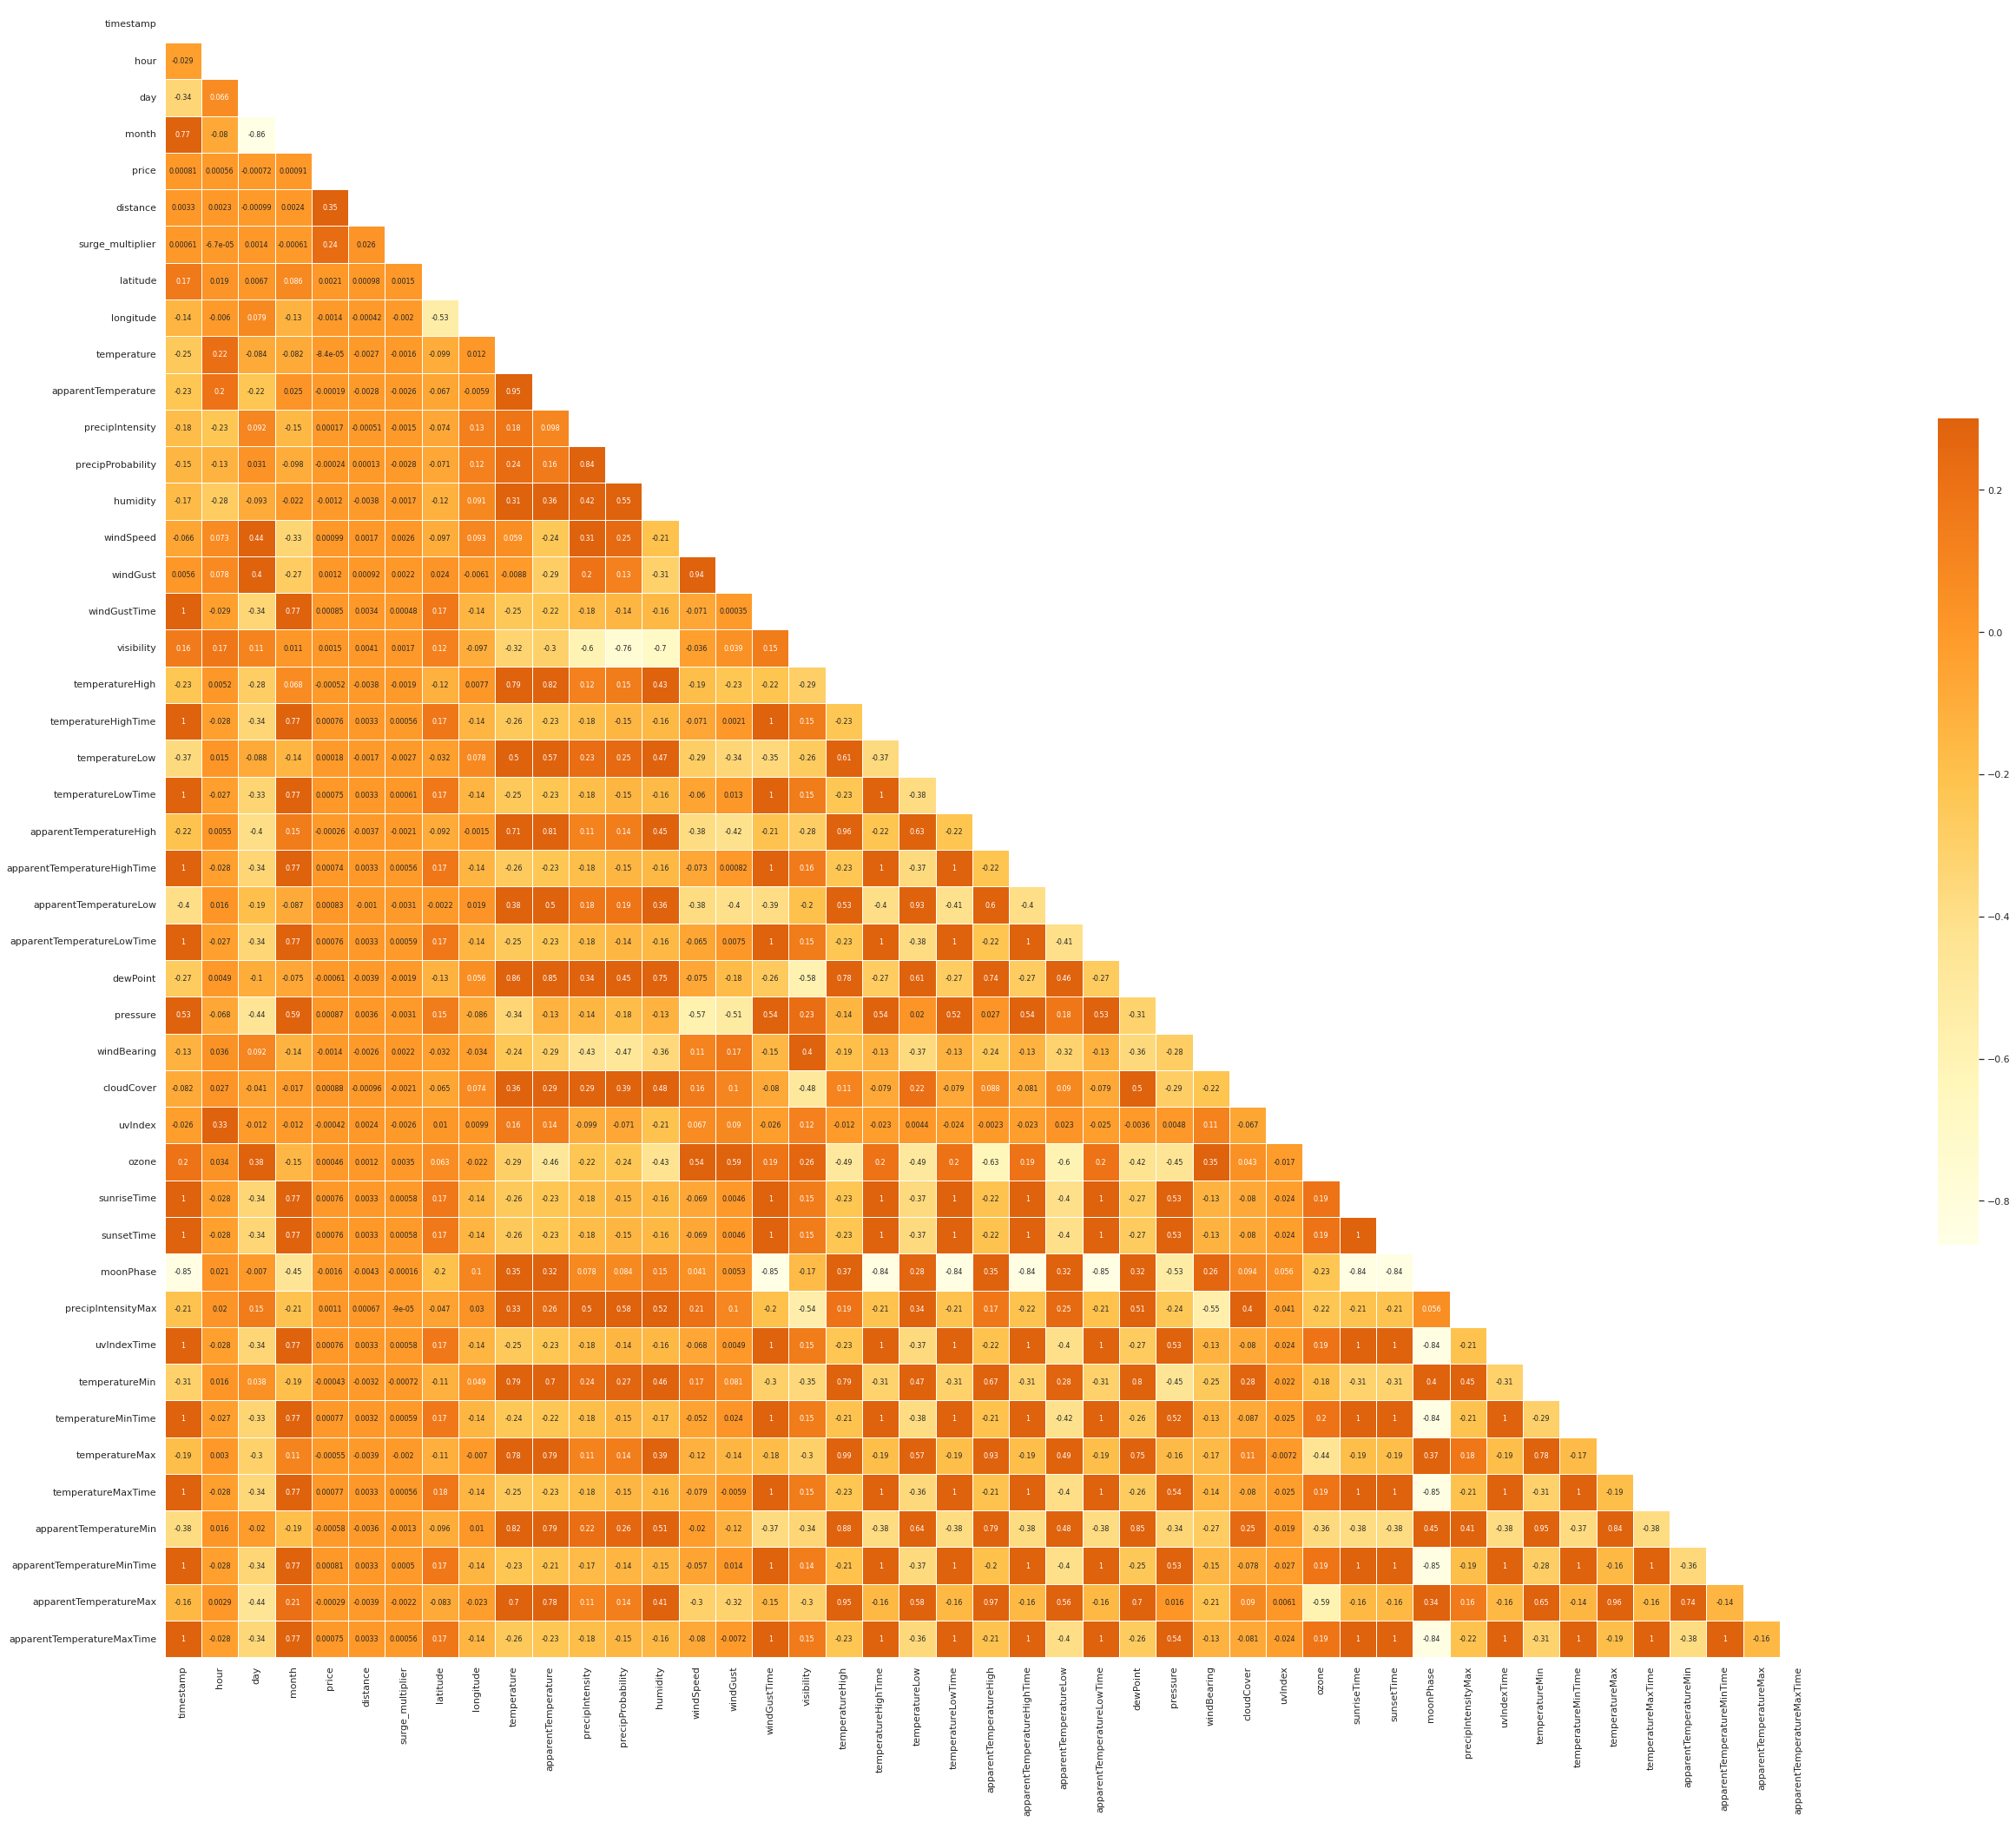

In [33]:
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(50, 35))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
            annot = True, annot_kws={"size": 8})
plt.savefig('correlation.png', bbox_inches='tight',pad_inches=0)

For the output variable "price":
- distance and surge multiplier are most relevant features
- other categorical features might be relevant

In [60]:
# For further modelling i don't think we need date related features. But maybe we need them in the future analysis.
# so i will make new dataframe

new_df = df.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime'],axis=1)

In [61]:
new_df.shape

(637976, 41)

### We see that all temperature related features have weak correlation with our target feature which is price

### Removing all of them will not make any impact to our regression model

In [62]:
new_df = new_df.drop(['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax'],axis=1)
new_df.shape

(637976, 30)

### Apparently all climate related features also have weak correlation with our target feature which is price

### Once again, removing all of them will not make any impact to our regression model

In [63]:
new_df = new_df.drop(['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax'],axis=1)
new_df.shape

(637976, 16)

### Checking our categorical value in our dataset features 

In [64]:
category_col = new_df.select_dtypes(include=['object','category']).columns.tolist()
for column in new_df[category_col]:
    print(f'{column} : {new_df[column].unique()}')
    print()

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']

short_summary : [' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Clou

### We can see that 'timezone' feature has only 1 value and 'product_id' feature contains many unidentified values. So we can remove or drop them.

In [65]:
new_df = new_df.drop(['timezone','product_id'],axis=1)

### Checking the correlation of our categorical features with our target feature (price)

In [66]:
new_cat = ['source',
 'destination',
 'cab_type',
 'name',
 'short_summary',
 'icon','price']

df_cat = new_df[new_cat]
df_cat.head()

source    destination cab_type          name    short_summary  \
0  Haymarket Square  North Station     Lyft        Shared   Mostly Cloudy    
1  Haymarket Square  North Station     Lyft           Lux            Rain    
2  Haymarket Square  North Station     Lyft          Lyft           Clear    
3  Haymarket Square  North Station     Lyft  Lux Black XL           Clear    
4  Haymarket Square  North Station     Lyft       Lyft XL   Partly Cloudy    

                    icon  price  
0   partly-cloudy-night     5.0  
1                  rain    11.0  
2           clear-night     7.0  
3           clear-night    26.0  
4   partly-cloudy-night     9.0

In [67]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_cat_encode= df_cat.copy()
for col in df_cat_encode.select_dtypes(include='O').columns:
    df_cat_encode[col]=le.fit_transform(df_cat_encode[col])

In [68]:
df_cat_encode

source  destination  cab_type  name  short_summary  icon  price
0            5            7         0     7              4     5    5.0
1            5            7         0     2              8     6   11.0
2            5            7         0     5              0     1    7.0
3            5            7         0     4              0     1   26.0
4            5            7         0     6              6     5    9.0
...        ...          ...       ...   ...            ...   ...    ...
693065      11            6         1    11              6     5    9.5
693066      11            6         1    10              6     5   13.0
693067      11            6         1     9              6     5    9.5
693069      11            6         1     1              6     5   27.0
693070      11            6         1     8              6     5   10.0

[637976 rows x 7 columns]

<AxesSubplot:>

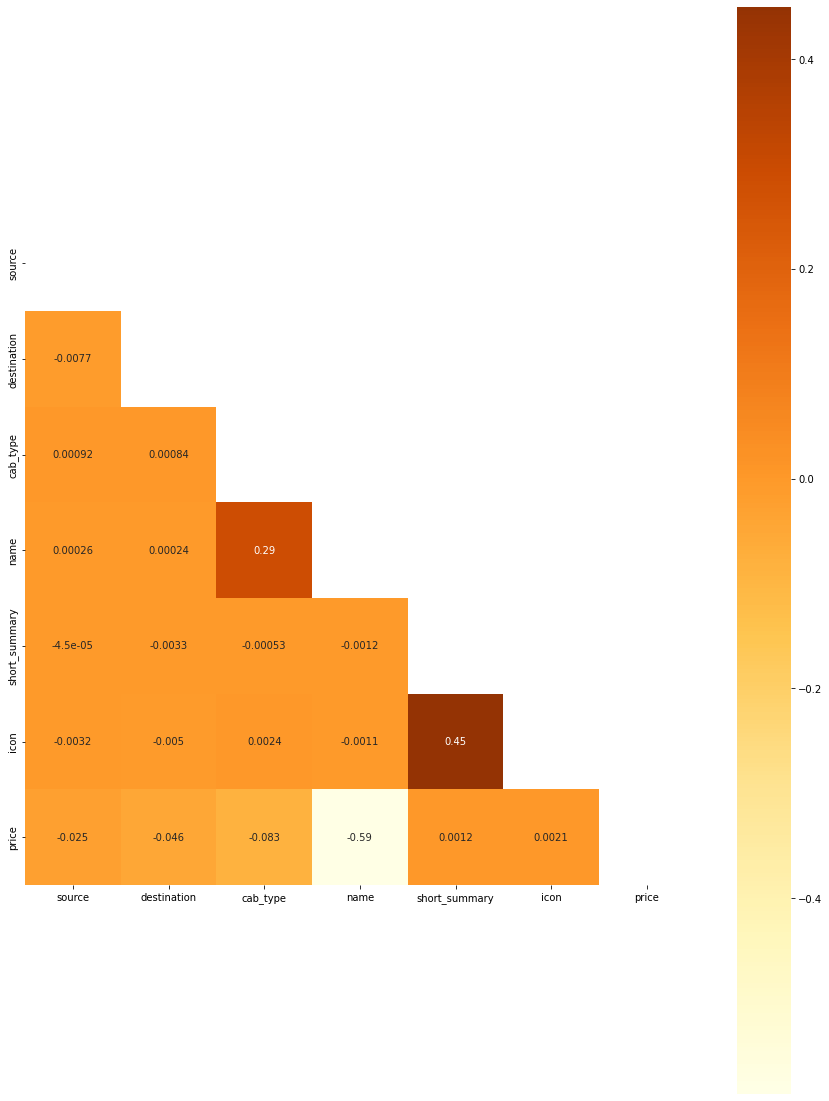

In [51]:
mask = np.triu(np.ones_like(df_cat_encode.corr(), dtype=bool))
cmap = sns.color_palette("YlOrBr", as_cmap=True)
plt.figure(figsize=(15,20))
sns.heatmap(df_cat_encode.corr(),mask=mask, cmap=cmap, center=0,
            square=True, 
            annot = True)

### We can see only name feature that has a relatively strong correlation. Source,destination, and cab_type features have relatively weak correlation, but i will pick cab_type feature because it has stronger correlation than other two features. I will drop or remove the rest of the columns

In [69]:
new_df = new_df.drop(['source','destination','short_summary','icon'],axis=1)
new_df.head()

hour  day  month cab_type          name  price  distance  surge_multiplier  \
0     9   16     12     Lyft        Shared    5.0      0.44               1.0   
1     2   27     11     Lyft           Lux   11.0      0.44               1.0   
2     1   28     11     Lyft          Lyft    7.0      0.44               1.0   
3     4   30     11     Lyft  Lux Black XL   26.0      0.44               1.0   
4     3   29     11     Lyft       Lyft XL    9.0      0.44               1.0   

   latitude  longitude  
0   42.2148    -71.033  
1   42.2148    -71.033  
2   42.2148    -71.033  
3   42.2148    -71.033  
4   42.2148    -71.033

### Also i will remove hour, day, month, latitude, longitude, because we won't need them for now

In [70]:
new_df = new_df.drop(['hour','day','month','latitude','longitude'],axis=1)
new_df.head()

cab_type          name  price  distance  surge_multiplier
0     Lyft        Shared    5.0      0.44               1.0
1     Lyft           Lux   11.0      0.44               1.0
2     Lyft          Lyft    7.0      0.44               1.0
3     Lyft  Lux Black XL   26.0      0.44               1.0
4     Lyft       Lyft XL    9.0      0.44               1.0

In [71]:
for col in new_df.select_dtypes(include='O').columns:
    new_df[col]=le.fit_transform(new_df[col])

In [72]:
new_df

cab_type  name  price  distance  surge_multiplier
0              0     7    5.0      0.44               1.0
1              0     2   11.0      0.44               1.0
2              0     5    7.0      0.44               1.0
3              0     4   26.0      0.44               1.0
4              0     6    9.0      0.44               1.0
...          ...   ...    ...       ...               ...
693065         1    11    9.5      1.00               1.0
693066         1    10   13.0      1.00               1.0
693067         1     9    9.5      1.00               1.0
693069         1     1   27.0      1.00               1.0
693070         1     8   10.0      1.00               1.0

[637976 rows x 5 columns]

## 2. Removing Outliers

### We're using IQR method for checking top and bottom outliers

In [73]:
for col in list(new_df.columns):
    outliers = find_outliers_IQR(new_df[col])
    print (col + '-----\n')

    print('number of outliers: '+ str(len(outliers)))

    print('max outlier value: '+ str(outliers.max()))

    print('min outlier value: '+ str(outliers.min()))
    print ('-----\n')

cab_type-----

number of outliers: 0
max outlier value: nan
min outlier value: nan
-----

name-----

number of outliers: 0
max outlier value: nan
min outlier value: nan
-----

price-----

number of outliers: 5589
max outlier value: 97.5
min outlier value: 43.0
-----

distance-----

number of outliers: 6672
max outlier value: 7.86
min outlier value: 5.43
-----

surge_multiplier-----

number of outliers: 20975
max outlier value: 3.0
min outlier value: 1.25
-----



In [76]:
original_df = new_df.copy()
original_df

cab_type  name  price  distance  surge_multiplier
0              0     7    5.0      0.44               1.0
1              0     2   11.0      0.44               1.0
2              0     5    7.0      0.44               1.0
3              0     4   26.0      0.44               1.0
4              0     6    9.0      0.44               1.0
...          ...   ...    ...       ...               ...
693065         1    11    9.5      1.00               1.0
693066         1    10   13.0      1.00               1.0
693067         1     9    9.5      1.00               1.0
693069         1     1   27.0      1.00               1.0
693070         1     8   10.0      1.00               1.0

[637976 rows x 5 columns]

In [77]:
X = new_df.drop(columns=['price'],axis=1).values
y = new_df['price'].values

new_df[list(price_df.columns)] = new_df[list(price_df.columns)].applymap(lambda x: np.log(x) if x > 0 else x)
new_df

cab_type  name     price  distance  surge_multiplier
0              0     7  1.609438 -0.820981               0.0
1              0     2  2.397895 -0.820981               0.0
2              0     5  1.945910 -0.820981               0.0
3              0     4  3.258097 -0.820981               0.0
4              0     6  2.197225 -0.820981               0.0
...          ...   ...       ...       ...               ...
693065         1    11  2.251292  0.000000               0.0
693066         1    10  2.564949  0.000000               0.0
693067         1     9  2.251292  0.000000               0.0
693069         1     1  3.295837  0.000000               0.0
693070         1     8  2.302585  0.000000               0.0

[637976 rows x 5 columns]

In [78]:
for col in list(new_df.columns):
    outliers = find_outliers_IQR(new_df[col])
    print (col + '-----\n')

    print('number of outliers: '+ str(len(outliers)))

    print('max outlier value: '+ str(outliers.max()))

    print('min outlier value: '+ str(outliers.min()))
    print ('-----\n')

cab_type-----

number of outliers: 0
max outlier value: nan
min outlier value: nan
-----

name-----

number of outliers: 0
max outlier value: nan
min outlier value: nan
-----

price-----

number of outliers: 22
max outlier value: 4.579852378003801
min outlier value: 4.48863636973214
-----

distance-----

number of outliers: 594
max outlier value: -1.0498221244986778
min outlier value: -3.912023005428146
-----

surge_multiplier-----

number of outliers: 20975
max outlier value: 1.0986122886681098
min outlier value: 0.22314355131420976
-----



In [79]:
Qp12 = new_df['price'].quantile(0.25)
Qp32 = new_df['price'].quantile(0.75)
IQRp = Qp32-Qp12

In [ ]:
Qd12 = new_df['distance'].quantile(0.25)
Qd32 = new_df['distance'].quantile(0.75)
IQRd = Qd32-Qd12

In [ ]:
Qs12 = new_df['surge_multiplier'].quantile(0.25)
Qs32 = new_df['surge_multiplier'].quantile(0.75)
IQRs = Qs32-Qs12

In [80]:
new_df[new_df['price']>(Qp32+(1.5*IQRp))]

cab_type  name     price  distance  surge_multiplier
28083          0     4  4.521789  1.358409          0.693147
56552          0     4  4.488636  1.444563          0.693147
70465          0     4  4.488636  1.510722          0.693147
71558          0     4  4.488636  1.534714          0.693147
75919          0     4  4.521789  1.321756          0.693147
108395         0     4  4.488636  1.211941          0.693147
164401         1     1  4.494239  2.009555          0.000000
271719         0     4  4.521789  1.684545          0.693147
280566         0     4  4.521789  1.684545          0.693147
297647         0     4  4.488636  1.211941          0.693147
301021         0     4  4.521789  1.678964          0.693147
346182         0     4  4.488636  1.403643          0.693147
440000         0     4  4.521789  1.680828          0.693147
445896         0     4  4.488636  1.601406          0.693147
515785         0     4  4.521789  1.321756          0.693147
537453         0     4  4.521789  1.479329          0.693147
560058         0     4  4.521789  1.474763          0.693147
567952         0     4  4.488636  1.631199          0.559616
571532         0     4  4.488636  1.688249          0.693147
597071         0     4  4.579852  1.488400          0.693147
654297         0     4  4.488636  1.474763          0.693147
656046         0     4  4.488636  1.686399          0.693147

In [81]:
new_df[new_df['price']<(Qp12-(1.5*IQRp))]

Empty DataFrame
Columns: [cab_type, name, price, distance, surge_multiplier]
Index: []

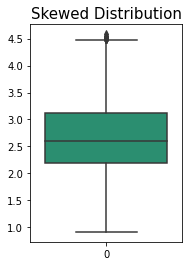

In [82]:
plt.subplot(1,2,2)
plt.title("Skewed Distribution", fontsize=15)
sns.boxplot(data = new_df["price"], palette="Dark2")
plt.show()

### We can see that we have 22 data outliers. We can drop them.

In [69]:
print('Size before removing :',new_df.shape)
new_df= new_df[~((new_df['price']>(Qp32+(1.5*IQRp))))]
print('Size after removing :',new_df.shape)

Size before removing : (637976, 5)
Size after removing : (637954, 5)


In [ ]:
print('Size before removing :',new_df.shape)
new_df= new_df[~((new_df['distance']>(Qd32+(1.5*IQRd))))]
print('Size after removing :',new_df.shape)

In [ ]:
print('Size before removing :',new_df.shape)
new_df= new_df[~((new_df['distance']>(Qs32+(1.5*IQRs))))]
print('Size after removing :',new_df.shape)

# 4. Regression Model

## Dataset Split

In [72]:
from sklearn.model_selection import train_test_split
X = new_df.drop(columns=['price'],axis=1).values
y = new_df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 3. Modeling

## 3.1. Base Model

In [73]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [74]:
# Fit to data training
model = reg.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [75]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5015292714130948

In [76]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

0.16127676775928107
0.4015927884801731


### Then for the long journey we have done, we got our regression model with accuracy or score 93.37% and RMSE value 2.26. It's not the best score though, we still can improve it with other regression models which could give better results.

## 3.2. Finding Best Models with best configuration with GridSearch CV

In [77]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,ShuffleSplit

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

import warnings
warnings.filterwarnings('ignore')

find_best_model_using_gridsearchcv(X,y)

model  best_score                               best_params
0  linear_regression    0.502661                       {'normalize': True}
1              lasso    0.100493       {'alpha': 1, 'selection': 'random'}
2      decision_tree    0.950761  {'criterion': 'mse', 'splitter': 'best'}

### Here we got our best model is decision tree regressor with r-squared 0.950, higher than our linear regression before.